## Importing libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

## Data import

In [48]:
emmisionsdata_df = pd.read_csv('/Users/user/Documents/GitHub/Bootcamp-Project-1/data/Euro_6_latest.csv', encoding = 'cp1252') 

In [71]:
emmisionsdata_df.tail(5)

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),Euro Standard,Diesel VED Supplement,Testing Scheme,WLTP Imperial Low,WLTP Imperial Medium,WLTP Imperial High,WLTP Imperial Extra High,WLTP Imperial Combined,WLTP Imperial Combined (Weighted),WLTP Metric Low,WLTP Metric Medium,WLTP Metric High,WLTP Metric Extra High,WLTP Metric Combined,WLTP Metric Combined (Weighted),WLTP CO2,WLTP CO2 Weighted,Equivalent All Electric Range Miles,Equivalent All Electric Range KM,Electric Range City Miles,Electric Range City Km,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Unnamed: 44
6329,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.4,254.0,50.0,31.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,3.4,76.0,76.0,27.0,44.0,29.0,46.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN
6330,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.4,254.0,50.0,31.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,104.5,0.0,0.0,0.0,0.0,0.0,2.7,61.0,57.0,30.0,49.0,35.0,56.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN
6331,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.4,254.0,50.0,31.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,3.4,76.0,76.0,27.0,44.0,29.0,46.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN
6332,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.5,241.0,46.0,29.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,104.5,0.0,0.0,0.0,0.0,0.0,2.7,61.0,57.0,30.0,49.0,35.0,56.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN
6333,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,2.5,241.0,46.0,29.0,Euro 6d,False,WLTP,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,3.4,76.0,76.0,27.0,44.0,29.0,46.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13 August 2021,NaN


In [42]:
(emmisionsdata_df['Engine Capacity'] == 1969.0).value_counts()

False    6334
Name: Engine Capacity, dtype: int64

In [39]:
emmisionsdata_df.shape

(6334, 45)

In [43]:
emmisionsdata_df['Powertrain'].unique()

array(['Internal Combustion Engine (ICE)',
       'Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV) / Pure Electric Vehicle / Electric Vehicle (EV)',
       'Liquified Petroleum Gas (LPG)',
       'Mild Hybrid Electric Vehicle (MHEV)',
       'Hybrid Electric Vehicle (HEV)'], dtype=object)

In [44]:
emmisionsdata_df['Engine Capacity'].unique()

array([998])

## Plots

In [ ]:
#scatter plot of  

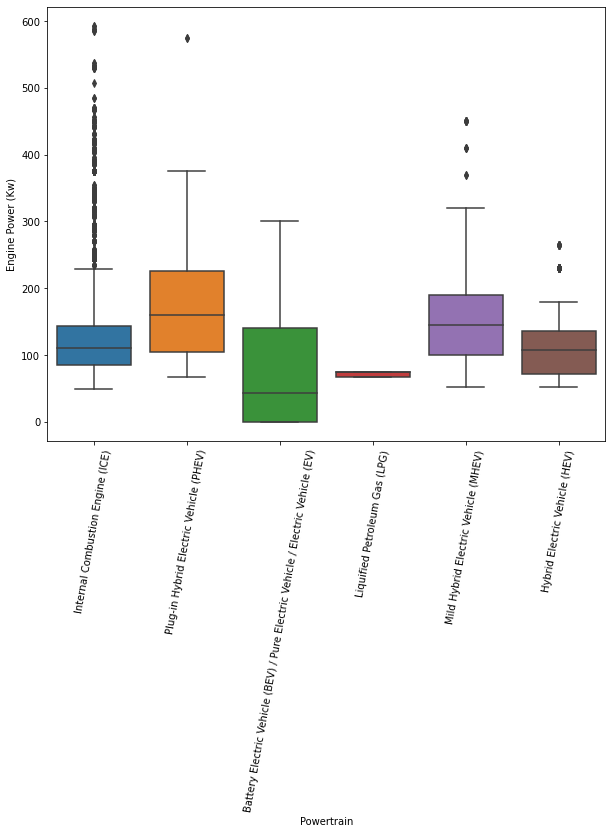

In [83]:
plt.figure(figsize=(10,8))
sns.boxplot(data=emmisionsdata_df, x="Powertrain", y="Engine Power (Kw)")
plt.xticks(rotation=80)
plt.show()

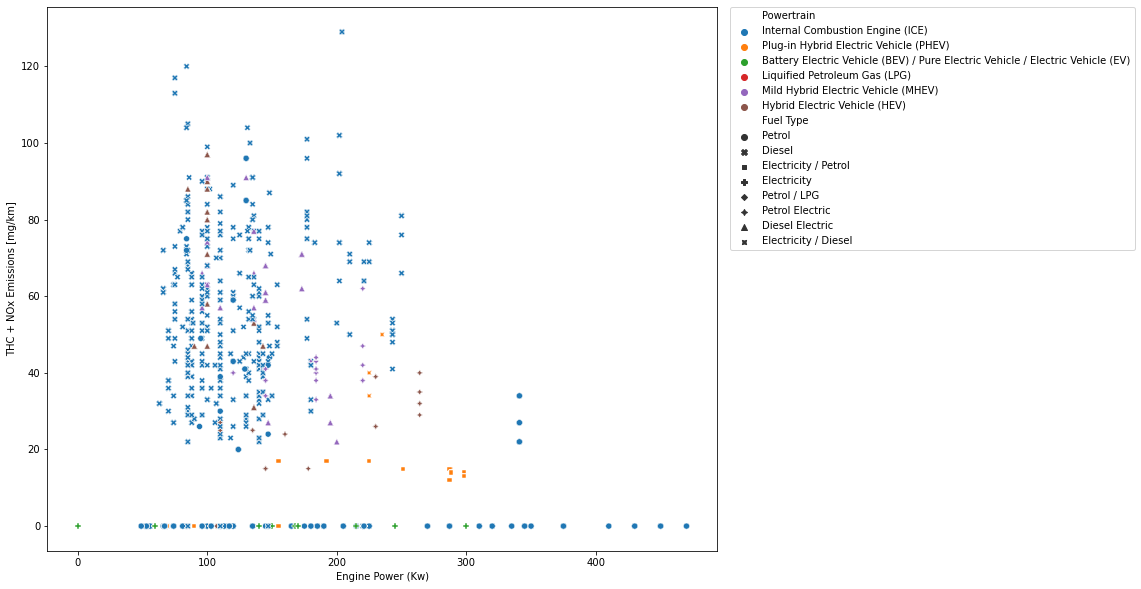

In [101]:
#diesel cars bad for human health, some petrol vehicles better than electric vehicles
plt.figure(figsize=(12,10))
sns.scatterplot(data= emmisionsdata_df, x='Engine Power (Kw)', 
                y='THC + NOx Emissions [mg/km]', hue='Powertrain', style = 'Fuel Type' )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

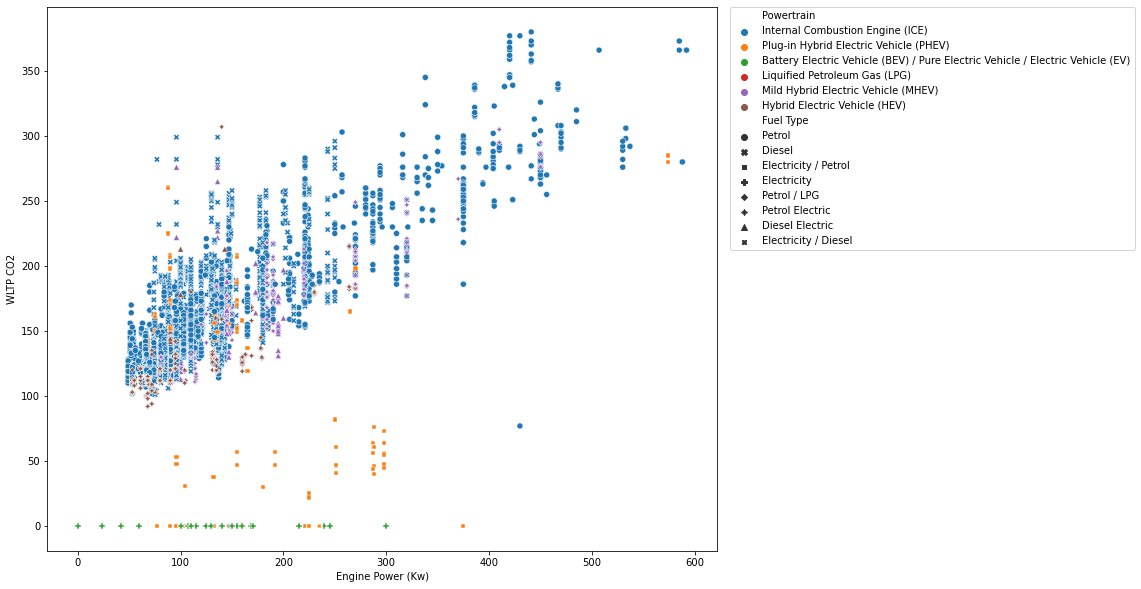

In [100]:
#Petrol vehicles bad for the atmosphere (global warming)
plt.figure(figsize=(12,10))
sns.scatterplot(data= emmisionsdata_df, x='Engine Power (Kw)', 
                y='WLTP CO2', hue='Powertrain', style = 'Fuel Type' )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [87]:
emmisionsdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6334 entries, 0 to 6333
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Manufacturer                           6334 non-null   object 
 1   Model                                  6334 non-null   object 
 2   Description                            6334 non-null   object 
 3   Transmission                           6185 non-null   object 
 4   Manual or Automatic                    6334 non-null   object 
 5   Engine Capacity                        6333 non-null   float64
 6   Fuel Type                              6334 non-null   object 
 7   Powertrain                             6334 non-null   object 
 8   Engine Power (PS)                      6290 non-null   float64
 9   Engine Power (Kw)                      6296 non-null   float64
 10  Electric energy consumption Miles/kWh  6315 non-null   float64
 11  wh/k

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine Power (Kw)', ylabel='THC + NOx Emissions [mg/km]'>

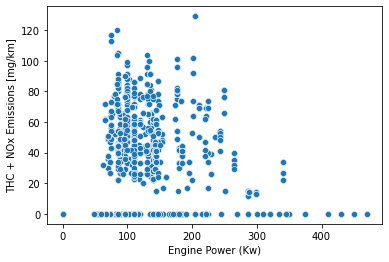

In [68]:
sns.scatterplot(emmisionsdata_df['Engine Power (Kw)'], emmisionsdata_df['THC + NOx Emissions [mg/km]'])

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Engine Power (Kw)', ylabel='Noise Level dB(A)'>

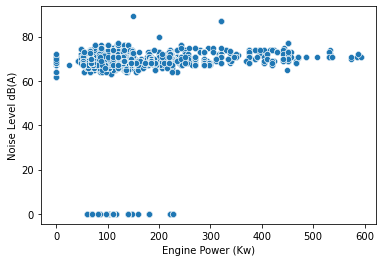

In [70]:
sns.scatterplot(emmisionsdata_df['Engine Power (Kw)'], emmisionsdata_df['Noise Level dB(A)'])

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Powertrain', ylabel='THC + NOx Emissions [mg/km]'>

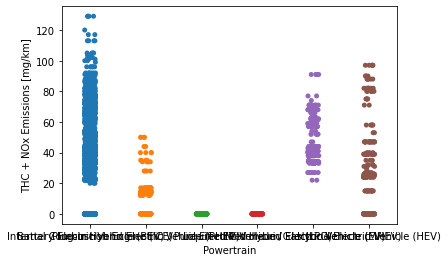

In [74]:
sns.stripplot(emmisionsdata_df['Powertrain'], emmisionsdata_df['THC + NOx Emissions [mg/km]'])

In [59]:
emmisionsdata_df.groupby(['Powertrain'])['THC + NOx Emissions [mg/km]', 'Noise Level dB(A)']

/var/folders/pr/15l_881n46j7cwzyn7wprqww0000gp/T/ipykernel_15768/4033985793.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  emmisionsdata_df.groupby(['Powertrain'])['THC + NOx Emissions [mg/km]', 'Noise Level dB(A)']


In [57]:
emmisionsdata_subset = emmisionsdata_df[['Powertrain','THC + NOx Emissions [mg/km]','Particulates [No.] [mg/km]', 'Noise Level dB(A)', ]]

In [ ]:
emmisionsdata_subset

In [ ]:
#https://ukvehicledata.co.uk/